In [1]:
from matplotlib import pyplot as plt
import numpy as np
import affine_invariant as af
from scipy.stats import norm, uniform
from time import time

/home/alisyaifudin/anaconda3/envs/maturin/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# plt.style.available

In [3]:
plt.style.use('seaborn-v0_8-bright') # I personally prefer seaborn for the graph style, but you may choose whichever you want.
params = {"ytick.color" : "black",
          "xtick.color" : "black",
          "axes.labelcolor" : "black",
          "axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern"]}
plt.rcParams.update(params)

In [4]:
rhob = [
    0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
e_rhob = [
    0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,
    0.00100, 0.00050
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [
    0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0
]
    
rhoDM = [0.016]

log_nu0 = [-3]

# sigmaDD = [7]
# e_sigmaDD = [1]

# hDD = [65]
# e_hDD = [5]

R = [3.4E-3]

zsun = [0]

w0 = [-7]

sigmaw = [6.]

log_a = [.5]

# theta = np.array([rhob + sigmaz + rhoDM + sigmaDD + hDD + R + zsun + sigmaw + w0]).flatten()
theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0+ sigmaw + log_a]).flatten()
# theta = np.array([theta])
theta.shape

(31,)

# tes potential

In [5]:
z_start = -1000
z_end = 1000
dz = 1.

z = np.arange(z_start, z_end, dz)
print(z)
phi = af.potential(z, theta)

[-1000.  -999.  -998. ...   997.   998.   999.]


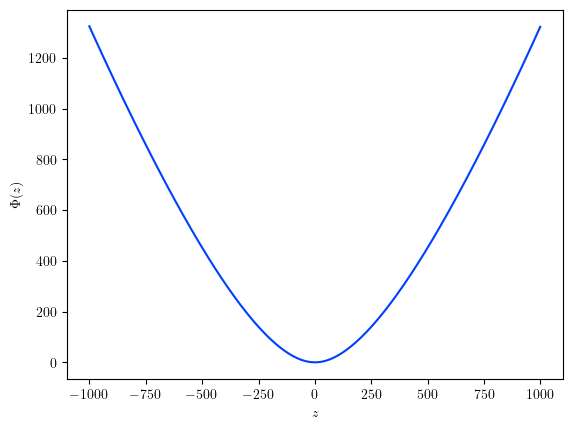

In [6]:
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()

# tes fz

In [7]:
fz = af.fz1(z, theta)
fz

array([5.28019768e-18, 5.57619780e-18, 5.88879124e-18, ...,
       6.21890822e-18, 5.88879124e-18, 5.57619780e-18])

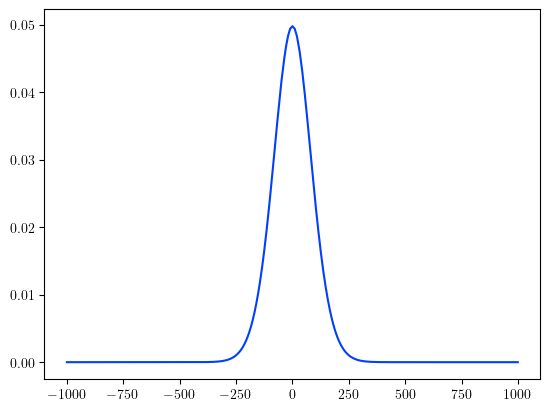

In [8]:
plt.plot(z, fz)

# tes fw

In [9]:
w = np.linspace(-50, 30, 1000)

fw = af.fw1(w, theta)
fw, fw.shape

(array([1.40994813e-12, 1.55133377e-12, 1.70659313e-12, 1.87705664e-12,
        2.06417921e-12, 2.26955159e-12, 2.49491272e-12, 2.74216316e-12,
        3.01337974e-12, 3.31083146e-12, 3.63699681e-12, 3.99458259e-12,
        4.38654437e-12, 4.81610876e-12, 5.28679759e-12, 5.80245415e-12,
        6.36727180e-12, 6.98582494e-12, 7.66310268e-12, 8.40454542e-12,
        9.21608454e-12, 1.01041855e-11, 1.10758944e-11, 1.21388890e-11,
        1.33015334e-11, 1.45729381e-11, 1.59630239e-11, 1.74825931e-11,
        1.91434042e-11, 2.09582554e-11, 2.29410728e-11, 2.51070078e-11,
        2.74725409e-11, 3.00555954e-11, 3.28756601e-11, 3.59539214e-11,
        3.93134073e-11, 4.29791422e-11, 4.69783154e-11, 5.13404619e-11,
        5.60976595e-11, 6.12847403e-11, 6.69395202e-11, 7.31030468e-11,
        7.98198667e-11, 8.71383146e-11, 9.51108254e-11, 1.03794271e-10,
        1.13250324e-10, 1.23545850e-10, 1.34753330e-10, 1.46951319e-10,
        1.60224936e-10, 1.74666398e-10, 1.90375588e-10, 2.074606

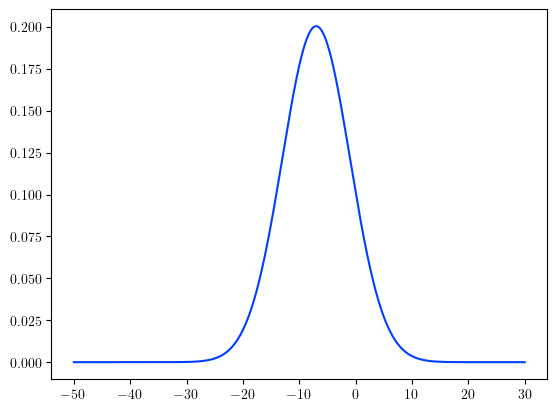

In [10]:
plt.plot(w, fw)

# tes log_prob

In [11]:
zdata = np.loadtxt('z.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]

wdata = np.loadtxt('w.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [16]:
locs = dict(
    rhoDM=-0.02,
    log_nu0=5,
    R=3.4E-3,
    zsun=-20,
    w0=-10,
    sigmaw=6,
    log_a=5
)

scales = dict(
    rhoDM=0.08,
    log_nu0=4,
    R=0.6E-3,
    zsun=40,
    w0=5,
    sigmaw=6,
    log_a=4
)

locs = np.array(list(locs.values()))
scales = np.array(list(scales.values()))
locs, scales

(array([-2.0e-02,  5.0e+00,  3.4e-03, -2.0e+01, -1.0e+01,  6.0e+00,
         5.0e+00]),
 array([8.e-02, 4.e+00, 6.e-04, 4.e+01, 5.e+00, 6.e+00, 4.e+00]))

In [17]:
af.log_prob(np.array([theta]), zdata, wdata, locs, scales)

array([-inf])

# mcmc

In [18]:
ndim = len(theta)
nwalkers = 2*ndim+2
nsteps = 10

In [19]:
rhob = [0.0104, 0.0277, 0.0073, 0.0005, 0.0006, 0.0018, 0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015]
e_rhob = [0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,
    0.00100, 0.00050]
sigmaz = [3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0]

In [15]:
# locs = {
#     'rhob' : rhob,
#     'sigmaz': sigmaz,
#     'rhoDM': -0.02,
#     'log_nu0': 3,
#     'R': 3.4E-3,
#     'zsun': -50.,
#     'w0': -15.,
#     'sigmaw':1.,
#     'log_a': 5
# }
# scales = {
#     'rhob' : e_rhob,
#     'sigmaz': e_sigmaz,
#     'rhoDM': 0.12,
#     'log_nu0': 5,
#     'R': 0.6E-3,
#     'zsun': 100.,
#     'w0': 15.,
#     'sigmaw': 19.,
#     'log_a': 5
# }

# rhob_0 = norm.rvs(loc=locs['rhob'], scale=scales['rhob'], size=(nwalkers, 12))
# sigmaz_0 = norm.rvs(loc=locs['sigmaz'], scale=scales['sigmaz'], size=(nwalkers, 12))

# rhoDM_0 = uniform.rvs(loc=locs['rhoDM'], scale=scales['rhoDM'], size=nwalkers)
# log_nu0_0 = uniform.rvs(loc=locs['log_nu0'], scale=scales['log_nu0'], size=nwalkers)
# R_0 = uniform.rvs(loc=locs['R'], scale=scales['R'], size=nwalkers)
# zsun_0 = uniform.rvs(loc=locs['zsun'], scale=scales['zsun'], size=nwalkers)
# w0_0 = uniform.rvs(loc=locs['w0'], scale=scales['w0'], size=nwalkers)
# sigmaw_0 = uniform.rvs(loc=locs['sigmaw'], scale=scales['sigmaw'], size=nwalkers)
# log_a_0 = uniform.rvs(loc=locs['log_a'], scale=scales['log_a'], size=nwalkers)

# p0 = np.array([*rhob_0.T, *sigmaz_0.T, rhoDM_0, log_nu0_0, R_0, zsun_0, w0_0, sigmaw_0, log_a_0]).T
# p0.shape

In [20]:
p0 = af.generate_p0_dm1(nwalkers, locs, scales)
p0.shape

(64, 31)

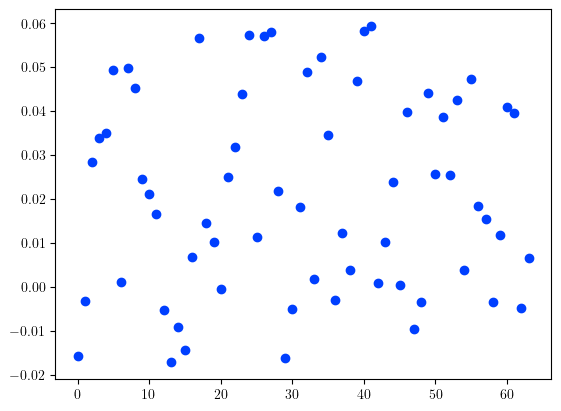

In [21]:
rhoDM = p0[:, 24]
plt.plot(rhoDM, 'o')

In [22]:
zdata = np.loadtxt('z.csv', skiprows=1, delimiter=',')
zmid = zdata[:, 0]
znum = zdata[:, 1]
zerr = zdata[:, 2]
dz = zmid[1] - zmid[0]

wdata = np.loadtxt('w.csv', skiprows=1, delimiter=',')
wmid = wdata[:, 0]
wnum = wdata[:, 1]
werr = wdata[:, 2]
dw = wmid[1] - wmid[0]
zbound = 50

zdata = (zmid, znum, zerr)
wdata = (wmid, wnum, werr)

In [23]:
af.log_prob(p0, zdata, wdata, locs, scales)

array([  -8190.35788065,   -8187.86914622,   -8382.43710006,
        -19152.80209571,  -53560.4269301 ,  -26034.45896419,
         -8394.07563634,  -30738.21518198,   -8145.79186755,
        -11032.69160563,  -17782.64887474,  -23583.3903917 ,
        -12202.74976375,  -15613.33259477,  -89108.06427977,
         -8190.28035963,   -9383.41050552, -288996.27014203,
         -8167.6153291 ,  -12733.84451093,  -32873.20842849,
         -8201.12145551,  -20735.96923641,  -96686.01800785,
        -38498.48154686,  -39623.53310968, -466887.23876898,
       -211298.96432071,  -27691.4642616 ,  -53456.71139568,
         -8233.81673992,  -13313.58587986,   -8247.1382817 ,
       -497869.14976565,   -8541.34160394,   -9982.86821237,
        -77443.69589621,  -53711.85341572,  -53548.36693658,
         -8141.11189846,   -8583.37692863, -313602.14430804,
       -909547.00080507,  -16603.94745238,   -8386.21300097,
         -8166.04146995,   -8534.61748025,   -8403.06274854,
       -255920.34245935,

In [24]:
rhob = [
    0.0104, 0.0277,  0.0073, 0.0005, 0.0006, 0.0018,
    0.0018, 0.0029, 0.0072, 0.0216, 0.0056, 0.0015
]
e_rhob = [
    0.00312, 0.00554, 0.00070, 0.00003, 0.00006, 0.00018, 0.00018, 0.00029, 0.00072, 0.00280,
    0.00100, 0.00050
]
sigmaz = [
    3.7, 7.1, 22.1, 39.0, 15.5, 7.5, 12.0, 
    18.0, 18.5, 18.5, 20.0, 20.0]
e_sigmaz = [
    0.2, 0.5, 2.4, 4.0, 1.6, 2.0, 2.4, 1.8, 1.9, 4.0, 5.0, 5.0
]
    
rhoDM = [0.016]

log_nu0 = [-3]

R = [3.4E-3]

zsun = [0]

w0 = [-7]

sigmaw = [10.]

log_a = [.5]

theta = np.array([rhob + sigmaz + rhoDM + log_nu0 + R + zsun + w0+ sigmaw + log_a]).flatten()

(31,)


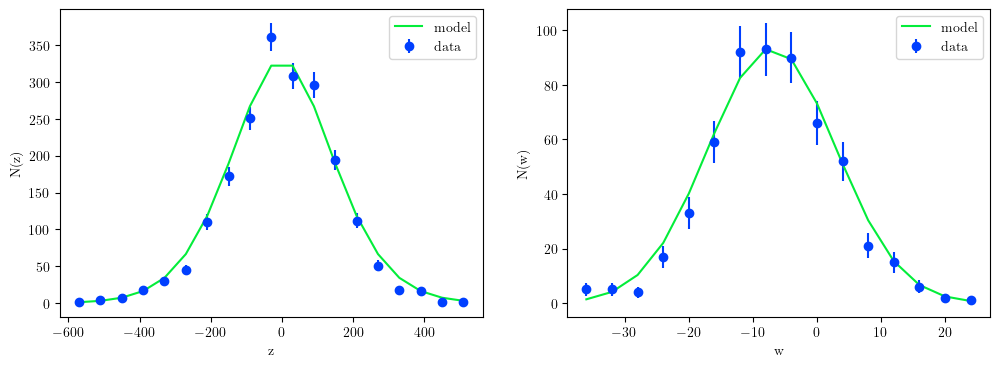

TypeError: log_prob() missing 2 required positional arguments: 'locs' and 'scales'

In [25]:
theta[25] = 5.8
# theta[0, 27] = 0
theta[30] = 7.1
print(theta.shape)
zmod = af.fz1(zmid, theta)
wmod = af.fw1(wmid, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='o', label='data')
ax[0].plot(zmid, zmod, label='model')
ax[0].set_xlabel('z')
ax[0].set_ylabel('N(z)')
ax[0].legend()
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='o', label='data')
ax[1].plot(wmid, wmod, label='model')
ax[1].set_xlabel('w')
ax[1].set_ylabel('N(w)')
ax[1].legend()
plt.show()
af.log_prob(np.array([theta]), zdata, wdata, locs, scales)

In [34]:
t0 = time()
sampler = af.mcmc_dm1(500, nwalkers, p0, zdata, wdata, locs, scales, dz=10, verbose=True)
print(time() - t0, "s")

Acceptance rate: 0.2624375
28.42738366127014 s


In [32]:
t0 = time()
sampler = af.mcmc_dm1(500, nwalkers, p0, zdata, wdata, locs, scales, parallel=True, batch=30, dz=10, verbose=True)
print(time() - t0, "s")

27.6594135761261 s


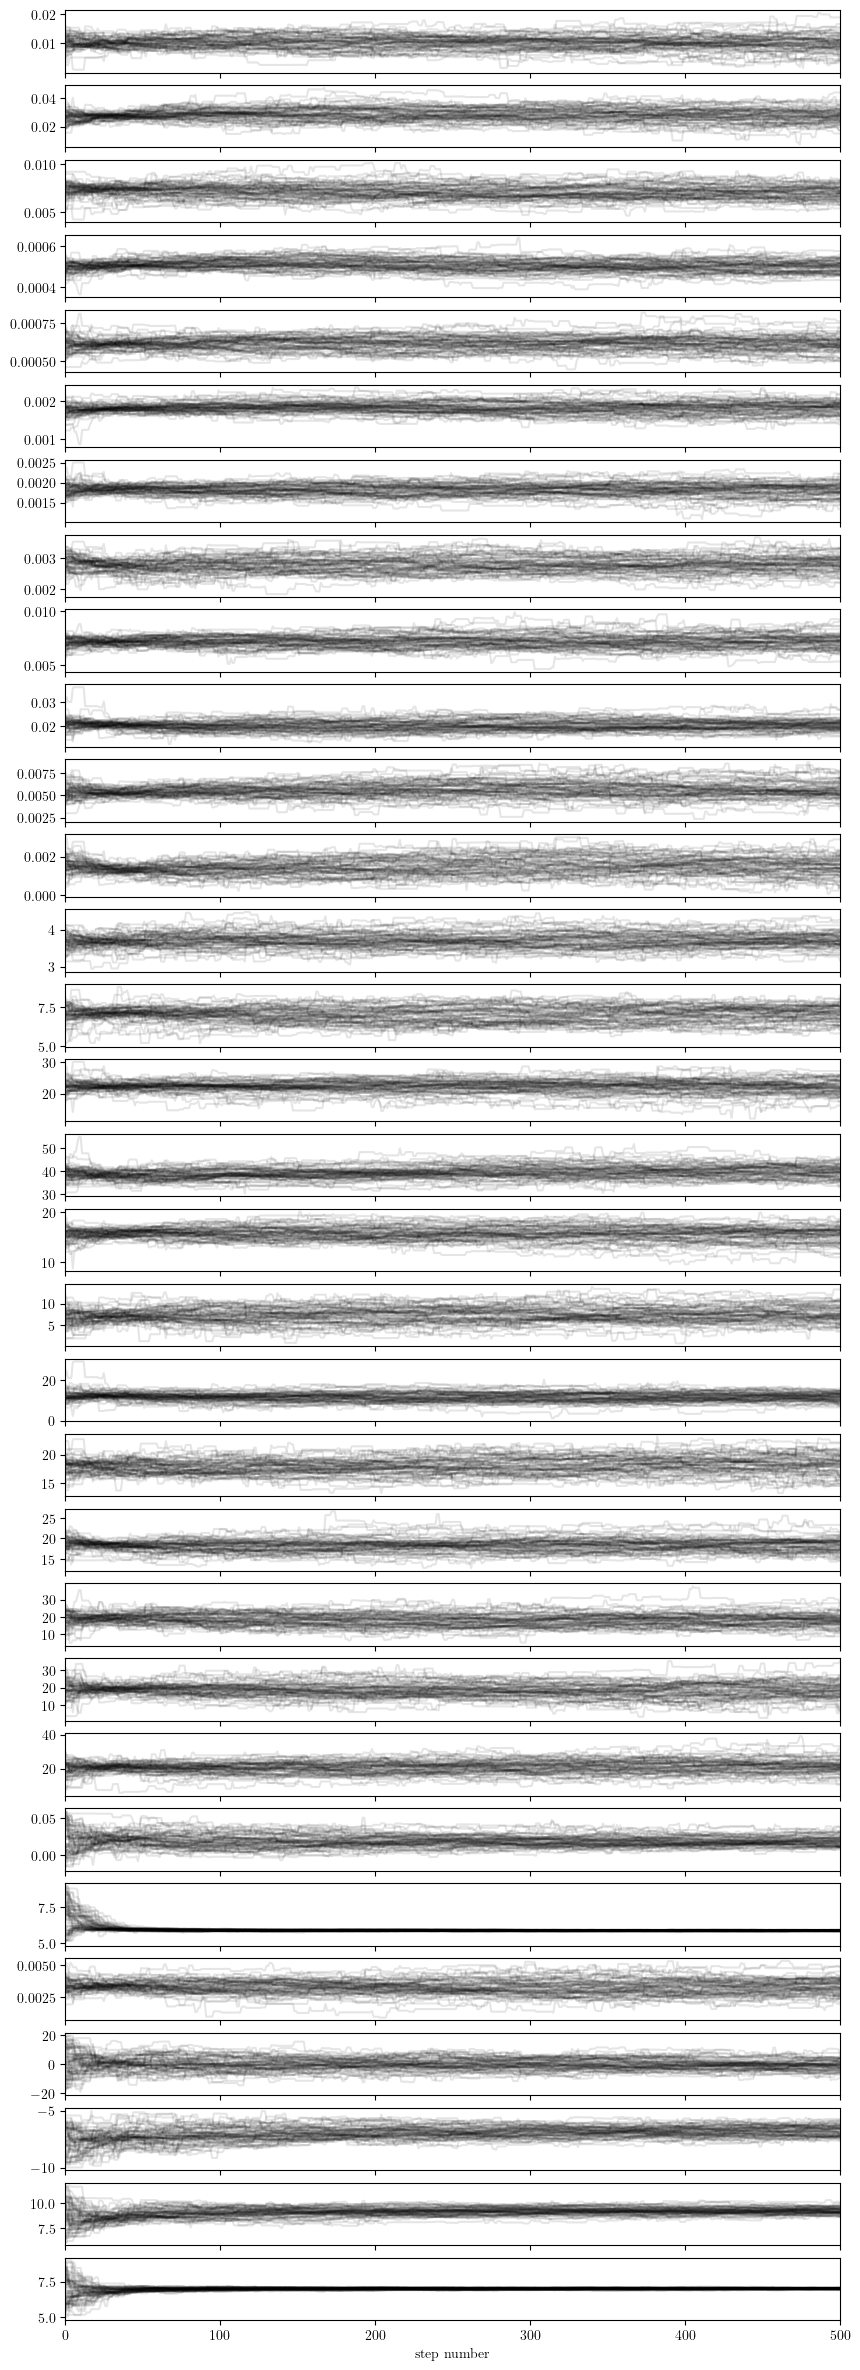

In [35]:
# plot
fig, axes = plt.subplots(31, 1, figsize=(10, 30), sharex=True)
for i in range(31):
    axes[i].plot(sampler[:, :, i], color="k", alpha=0.1)
    axes[i].set_xlim(0, len(sampler)-1)
axes[-1].set_xlabel("step number")
plt.show()

In [ ]:
p0_next = sampler[-1, :, :]
# sampler = af.mcmc_dm1(500, nwalkers, p0_next, zdata, wdata, verbose=True, parallel=True, batch=20, dz=10)
sampler = af.mcmc_dm1(2000, nwalkers, p0_next, zdata, wdata, locs, scales, verbose=True, dz=10)

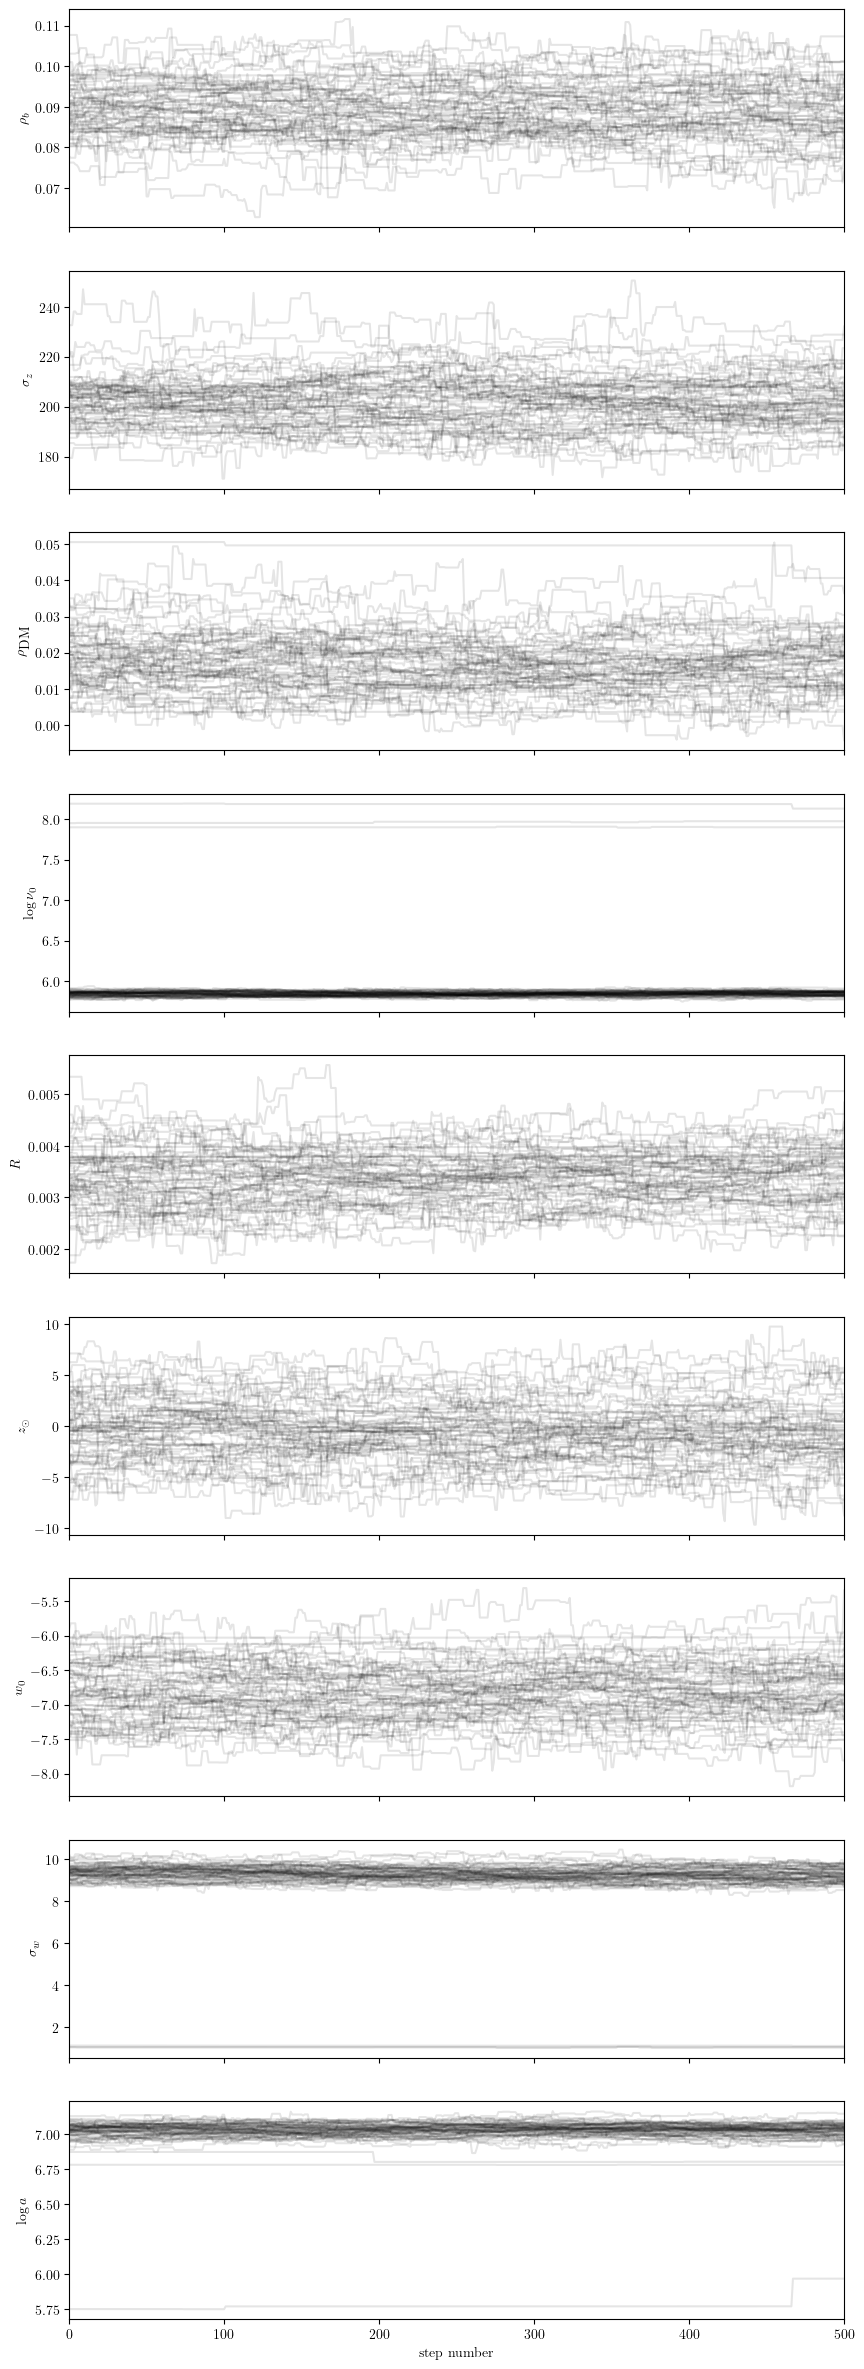

In [19]:
rhob = sampler[:, :, :12].sum(axis=2)
sigmaz = sampler[:, :, 12:24].sum(axis=2)
rhoDM = sampler[:, :, 24]
nu0 = sampler[:, :, 25]
R = sampler[:, :, 26]
zsun = sampler[:, :, 27]
w0 = sampler[:, :, 28]
sigmaw = sampler[:, :, 29]
a = sampler[:, :, 30]

params = [rhob, sigmaz, rhoDM, nu0, R, zsun, w0, sigmaw, a]
labels = [r'$\rho_b$', r'$\sigma_z$', r'$\rho_{\textup{DM}}$', r'$\log \nu_0$', r'$R$', r'$z_{\odot}$', 
          r'$w_0$', r'$\sigma_w$', r'$\log a$']

fig, axes = plt.subplots(9, 1, figsize=(10, 30), sharex=True)
for i in range(9):
    axes[i].plot(params[i], color="k", alpha=0.1)
    axes[i].set_xlim(0, len(sampler)-1)
    axes[i].set_ylabel(labels[i])
axes[-1].set_xlabel("step number")
plt.show()

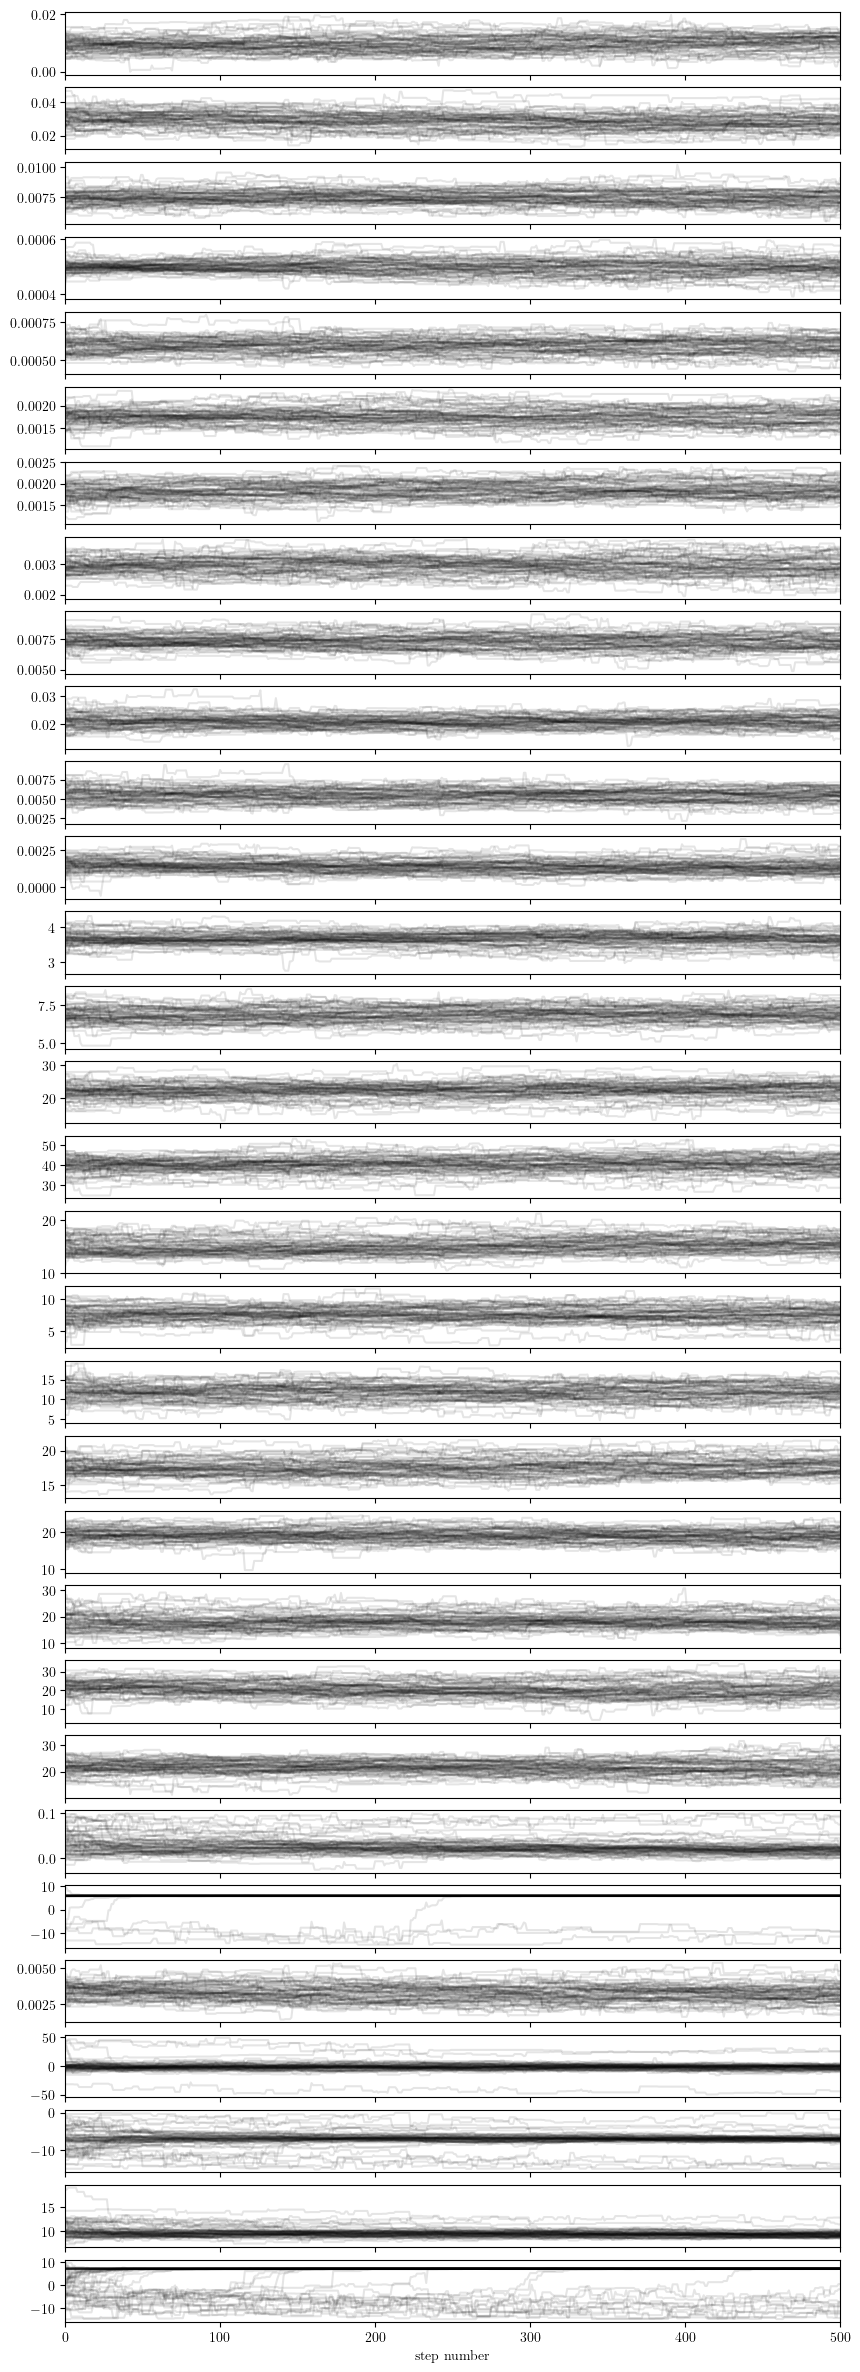

In [45]:
# plot
fig, axes = plt.subplots(31, 1, figsize=(10, 30), sharex=True)
for i in range(31):
    axes[i].plot(sampler[:, :, i], color="k", alpha=0.1)
    axes[i].set_xlim(0, len(sampler)-1)
axes[-1].set_xlabel("step number")
plt.show()

In [20]:
import pandas as pd
from tqdm import tqdm

df_com = []
df_dict = {}

for i in tqdm(range(nwalkers)):
    chain = sampler[:, i, :]
    for j in range(12):
        df_dict[f'rhob_{j}'] = chain[:, j]
        df_dict[f'sigmaz_{j}'] = chain[:, j+12]
    df_dict['rhoDM'] = chain[:, 24]
    df_dict['nu0'] = chain[:, 25]
    df_dict['R'] = chain[:, 26]
    df_dict['zsun'] = chain[:, 27]
    df_dict['w0'] = chain[:, 28]
    df_dict['sigmaw'] = chain[:, 29]
    df_dict['a'] = chain[:, 30]
    df_dict['walker'] = np.repeat(i, len(chain[:, 30]))
    df = pd.DataFrame(df_dict)
    if len(df_com) == 0:
        df_com = df
    else:
        df_com = pd.concat([df_com, df], ignore_index=True)
df_com

100%|██████████| 62/62 [00:00<00:00, 216.70it/s]


rhob_0  sigmaz_0    rhob_1  sigmaz_1    rhob_2   sigmaz_2    rhob_3  \
0      0.013112  3.790532  0.038929  6.008168  0.007110  21.914535  0.000582   
1      0.009572  3.723292  0.032385  7.128194  0.007417  23.350473  0.000535   
2      0.010292  3.724551  0.042159  7.550363  0.005754  23.133342  0.000516   
3      0.011275  3.376244  0.032430  7.134302  0.006446  22.162035  0.000501   
4      0.011270  3.712636  0.030242  6.497622  0.006443  21.896007  0.000473   
...         ...       ...       ...       ...       ...        ...       ...   
62057 -0.000632  3.873994  0.053022  7.327586  0.006658  25.114853  0.000509   
62058  0.008093  3.921957  0.035291  7.526170  0.008516  20.278061  0.000536   
62059  0.010009  3.474374  0.037225  6.770058  0.001530  19.664422  0.000531   
62060  0.008871  3.728289  0.021779  4.578358  0.007484  16.522557  0.000621   
62061  0.014627  3.182581  0.034525  8.452545  0.010322  37.693732  0.000438   

         sigmaz_3    rhob_4   sigmaz_4  ...   rhob_11  sigmaz_11     rhoDM  \
0       43.060061  0.000625   9.973636  ...  0.001398  18.318590  0.046748   
1       42.094675  0.000535  17.702544  ...  0.001287  25.202914  0.040690   
2       40.422228  0.000571  14.649007  ...  0.001439  20.527101  0.035069   
3       47.517318  0.000652  16.289687  ...  0.001232  24.255113 -0.011604   
4       34.036446  0.000615  14.121068  ...  0.001451  16.886766  0.017932   
...           ...       ...        ...  ...       ...        ...       ...   
62057   24.963797  0.000538  15.508232  ...  0.001019  21.936874  0.017905   
62058   38.217993  0.000592  15.611586  ...  0.002697  14.561968  0.034454   
62059   38.867538  0.000596  14.495726  ...  0.001541  18.667961  0.057223   
62060  107.778000  0.000888  10.394329  ...  0.002545  12.498440  0.002434   
62061   39.117126  0.000466  17.223641  ...  0.001191   7.750753  0.029782   

            nu0         R       zsun        w0     sigmaw         a  walker  
0      5.749226  0.003241  -5.056105 -7.833325   7.110181  7.473262       0  
1      5.848784  0.003723   9.714883 -6.709958  10.471162  7.863100       0  
2      5.696666  0.003670 -13.003981 -7.964314   7.873912  7.768372       0  
3      5.781395  0.003475   1.834640 -7.338977   5.441505  7.798753       0  
4      5.840573  0.004041  -2.685830 -7.688309   7.917179  7.563246       0  
...         ...       ...        ...       ...        ...       ...     ...  
62057  5.716245  0.003889   3.082911 -3.620824   5.566797  7.604128      61  
62058  5.920519  0.003605   9.615958 -6.646216   9.901943  7.360239      61  
62059  5.644454  0.003307 -37.703639 -5.536673   8.264109  7.802285      61  
62060  5.295227  0.003063   3.287097 -6.454110   5.090152  7.544044      61  
62061  5.767429  0.003827  -2.620140 -8.054001   2.640287  7.689115      61  

[62062 rows x 32 columns]

In [29]:
df_com.to_csv('chain.csv', index=False)

In [22]:
rhob

[0.0104,
 0.0277,
 0.0073,
 0.0005,
 0.0006,
 0.0018,
 0.0018,
 0.0029,
 0.0072,
 0.0216,
 0.0056,
 0.0015]

In [23]:
rhob = sampler[:, :, :12].sum(axis=2)
sigmaz = sampler[:, :, 12:24].sum(axis=2)
rhoDM = sampler[:, :, 24]
nu0 = sampler[:, :, 25]
R = sampler[:, :, 26]
zsun = sampler[:, :, 27]
w0 = sampler[:, :, 28]
sigmaw = sampler[:, :, 29]
a = sampler[:, :, 30]

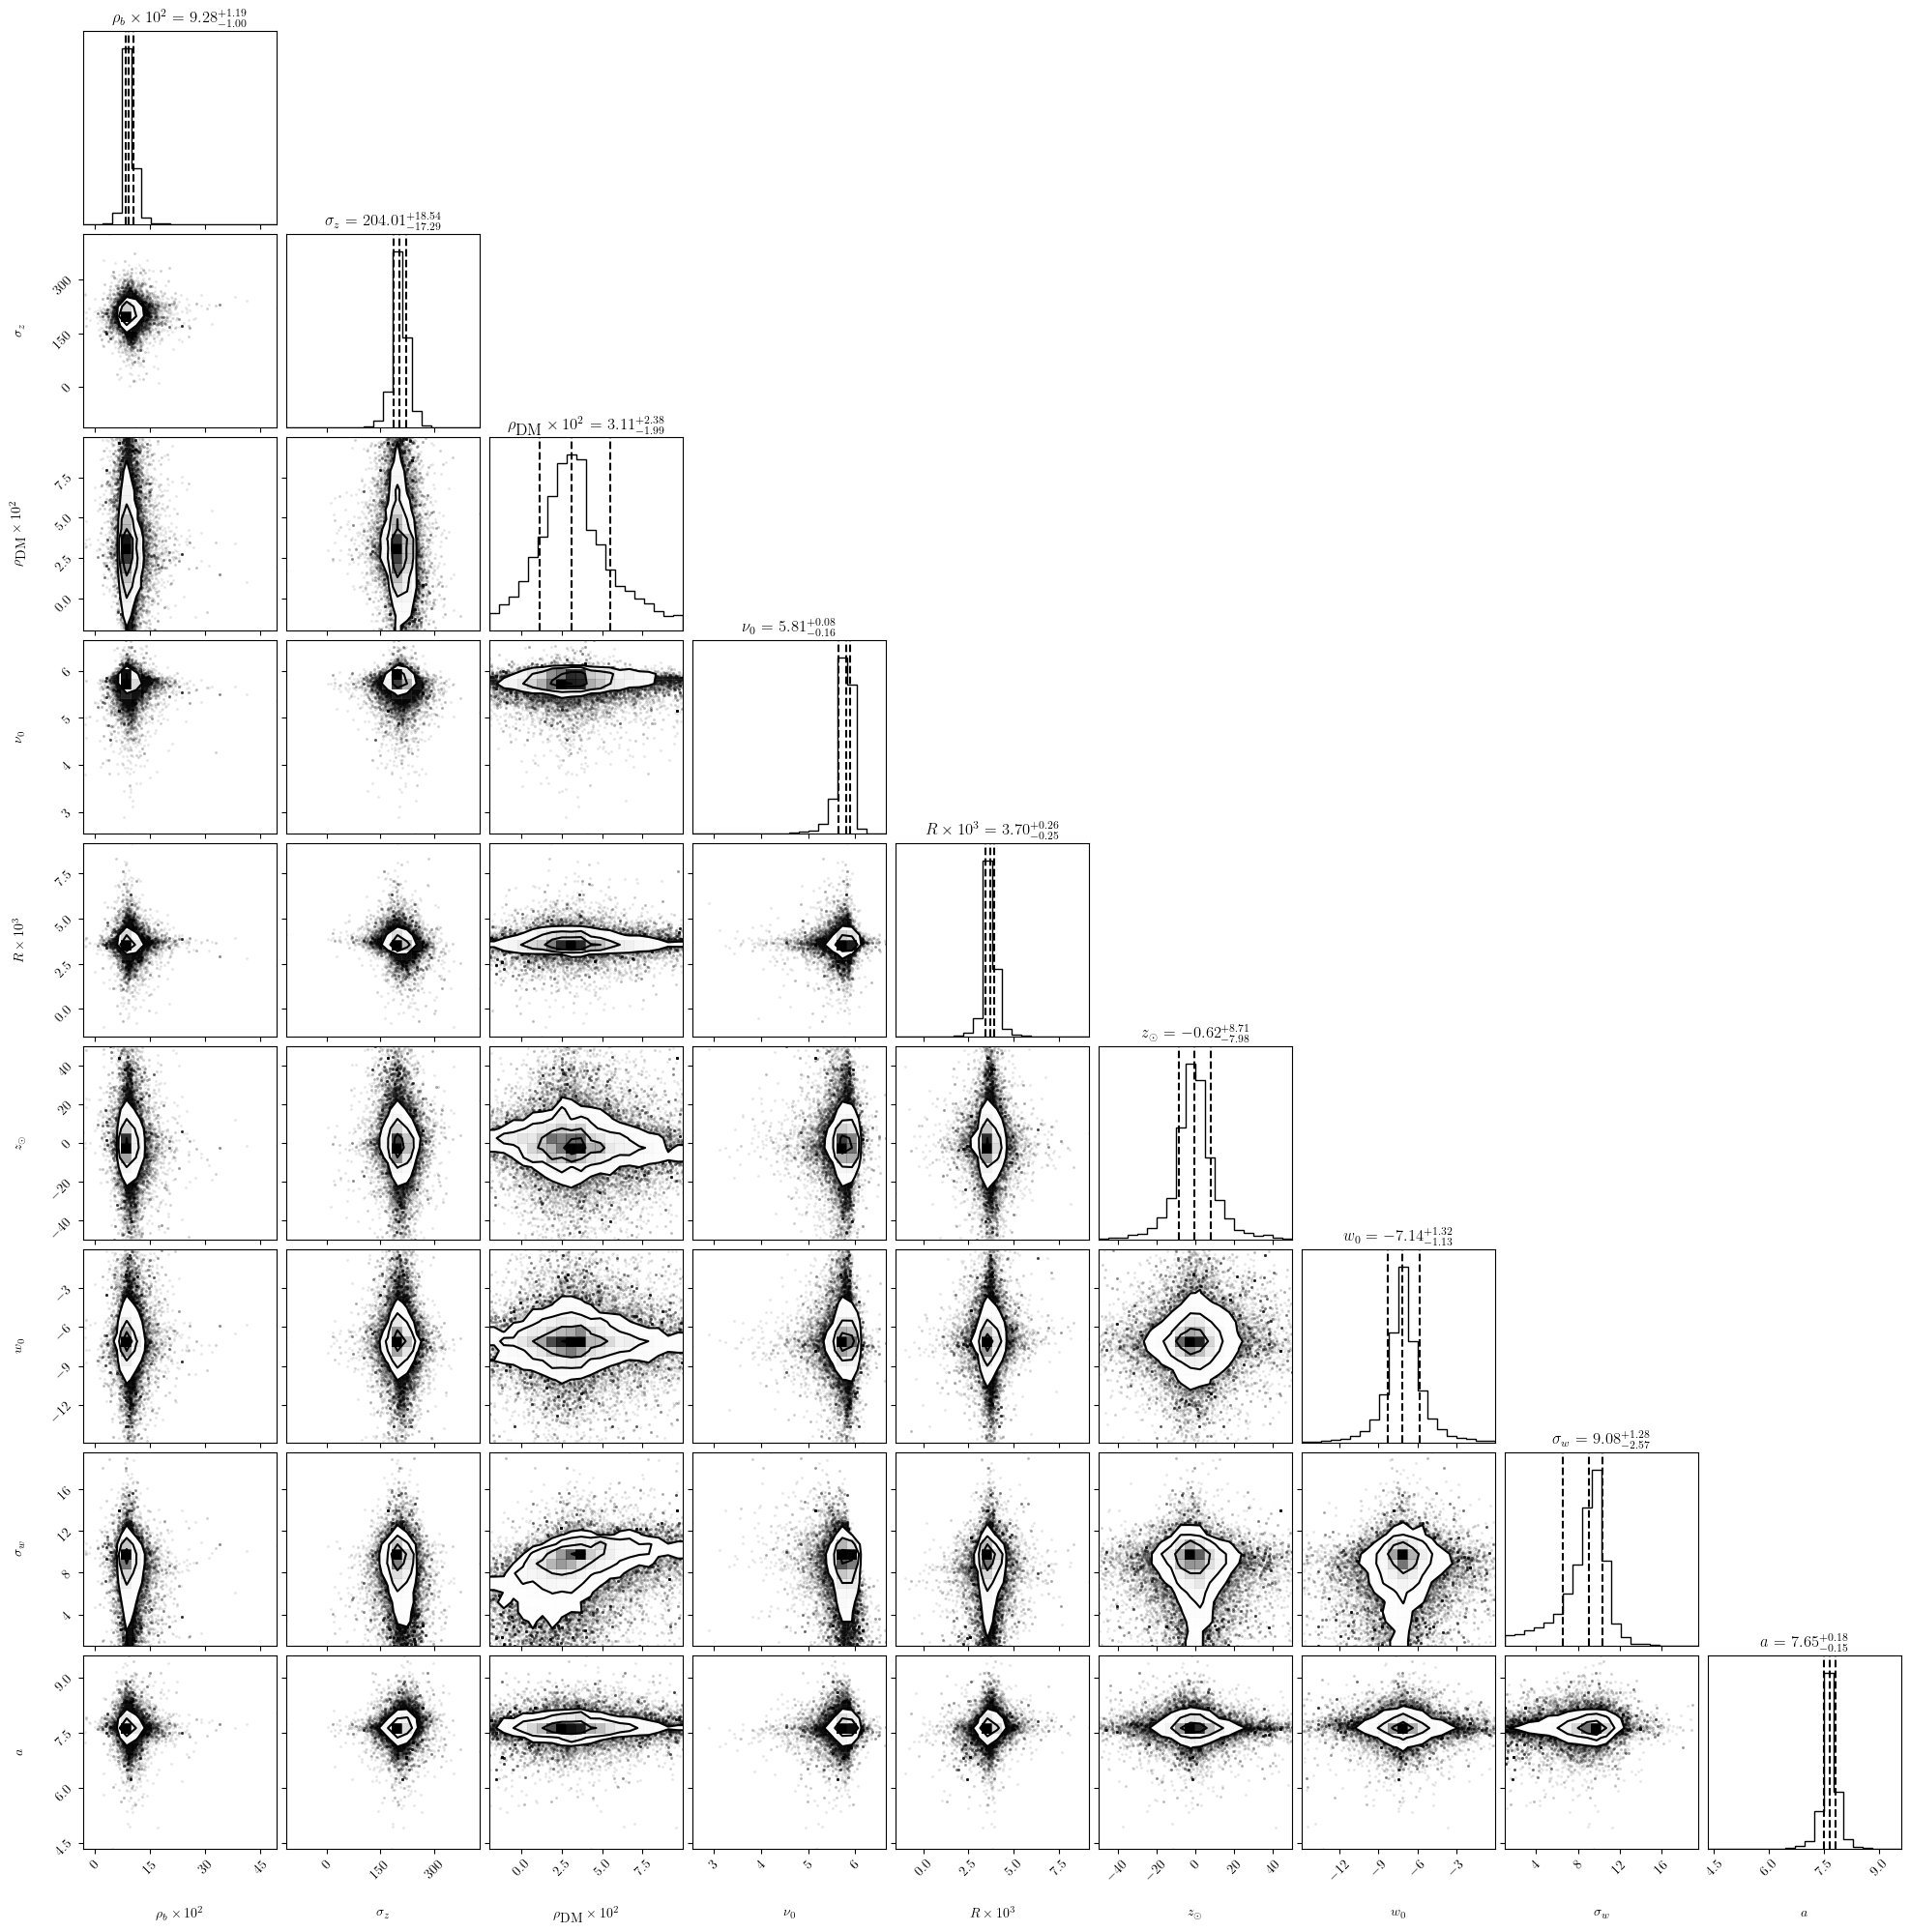

In [25]:
import corner

rhob_f = rhob.reshape(-1)/1E-2
sigmaz_f = sigmaz.reshape(-1)
rhoDM_f = rhoDM.reshape(-1)/1E-2
nu0_f = nu0.reshape(-1)
R_f = R.reshape(-1)/1E-3
zsun_f = zsun.reshape(-1)
w0_f = w0.reshape(-1)
sigmaw_f = sigmaw.reshape(-1)
a_f = a.reshape(-1)


flat_samples = np.array([rhob_f, sigmaz_f, rhoDM_f, nu0_f, R_f, zsun_f, w0_f, sigmaw_f, a_f])
labels = [r'$\rho_b\times 10^2$', r'$\sigma_z$', r'$\rho_{\textup{DM}}\times 10^2$', r'$\nu_0$', r'$R\times 10^3$', r'$z_{\odot}$', r'$w_0$', r'$\sigma_w$', r'$a$']

fig = corner.corner(
    flat_samples.T, labels=labels, quantiles=[0.16, 0.5, 0.84], show_titles=True, title_kwargs={"fontsize": 12}
)
fig.savefig("corner.png", dpi=70)
plt.show()
# fit

fitting....


100%|██████████| 2000/2000 [00:03<00:00, 613.66it/s]


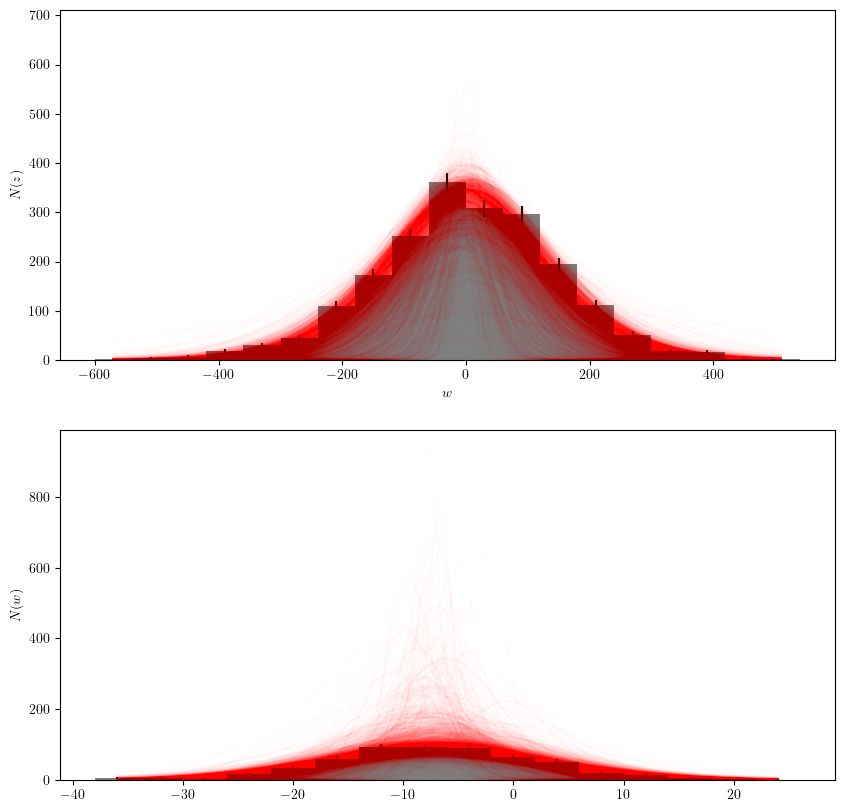

In [28]:
zs = np.linspace(zmid.min(), zmid.max(), 100)
ws = np.linspace(wmid.min(), wmid.max(), 100)
flat_samples = sampler.reshape((-1, ndim))
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].bar(zmid, znum, yerr=zerr, width=dz, color='k', alpha=0.5)
axes[0].set_ylabel(r'$N(z)$')
axes[0].set_xlabel(r'$z$')
axes[1].bar(wmid, wnum, yerr=werr, width=dw, color='k', alpha=0.5)
axes[1].set_ylabel(r'$N(w)$')
axes[0].set_xlabel(r'$w$')
print("fitting....")
for i in tqdm(range(2000)):
    ind = np.random.randint(len(flat_samples))
    theta = np.array([flat_samples[ind]])
    fz_mod = af.fz1(zs, theta)
    fw_mod = af.fw1(ws, zbound, theta)
    axes[0].plot(zs, fz_mod[0], color='r', alpha=0.01)
    axes[1].plot(ws, fw_mod[0], color='r', alpha=0.01)
plt.savefig('fit.png', dpi=70)
plt.show()

In [27]:
flat_samples = sampler.reshape((-1, ndim))

(6464, 29)

100%|██████████| 100/100 [00:00<00:00, 603.17it/s]


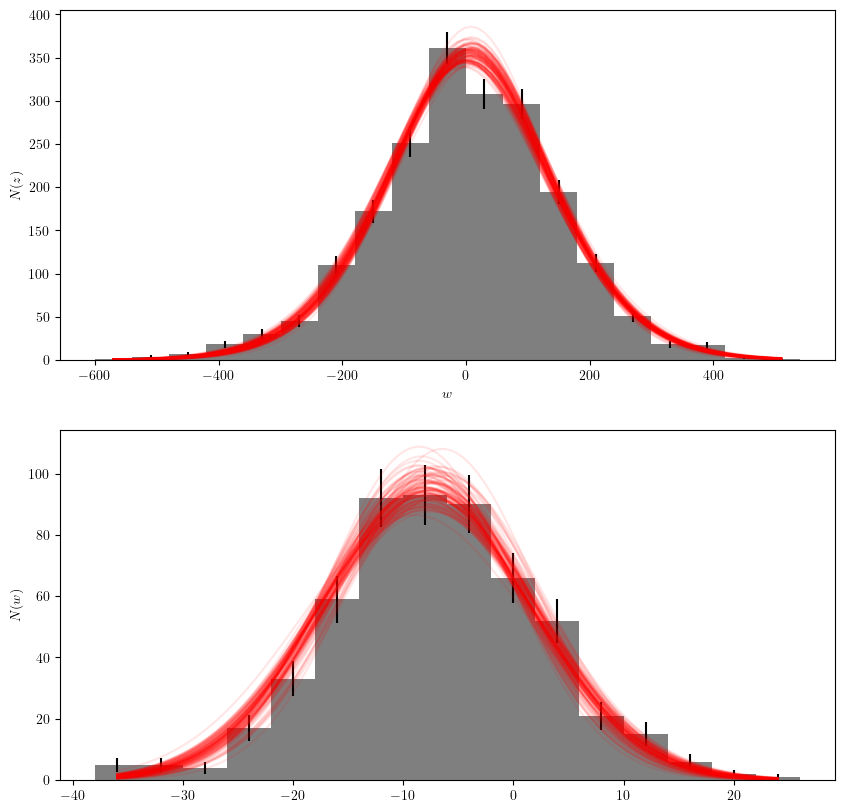

In [28]:
from tqdm import tqdm

Nz = znum.sum()
Nw = wnum.sum()

zs = np.linspace(zmid.min(), zmid.max(), 100)
ws = np.linspace(wmid.min(), wmid.max(), 100)

flat_samples = sampler[10:].reshape((-1, ndim))

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].bar(zmid, znum, yerr=zerr, width=dz, color='k', alpha=0.5)
axes[0].set_ylabel(r'$N(z)$')
axes[0].set_xlabel(r'$z$')
axes[1].bar(wmid, wnum, yerr=werr, width=dw, color='k', alpha=0.5)
axes[1].set_ylabel(r'$N(w)$')
axes[0].set_xlabel(r'$w$')
for i in tqdm(range(100)):
    ind = np.random.randint(len(flat_samples))
    theta = flat_samples[ind]
    Nz_mod = af.Nz1(zs, dz, Nz, theta)
    Nw_mod = af.Nw1(ws, dw, Nw, zbound, theta)
    axes[0].plot(zs, Nz_mod, color='r', alpha=0.1)
    axes[1].plot(ws, Nw_mod, color='r', alpha=0.1)
plt.show()

In [ ]:
Fw = np.trapz(FZW, z, axis=0)

plt.plot(w, Fw)

In [ ]:
def log_prior(z, w):
    resz = norm.logpdf(z, loc=-500, scale=1000)
    resw = norm.logpdf(w, loc=-30, scale=60)
    return resz + resw

def log_density(pos, theta):
    z, w = pos
    prior = log_prior(z, w)
    if not np.isfinite(prior):
        return -np.inf
    res = np.log(fzw(z, w, theta))
    return res

In [ ]:
import emcee

ndim = 2
nwalkers = 16

z_0 = np.random.uniform(-300, 300, nwalkers)
w_0 = np.random.uniform(-30, 30, nwalkers)

p0 = np.array([z_0, w_0]).T

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_density, args=(theta,))

In [ ]:
nsteps = 2000
sampler.run_mcmc(p0, nsteps, progress=True);

In [ ]:
labels = [r'$z$', r'$w$']
samples = sampler.get_chain()

fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
for i, label in enumerate(labels):
    axes[i].plot(samples[:, :, i], "k", alpha=0.1)
    axes[i].set_xlim(0, nsteps)
    axes[i].set_ylabel(label)
axes[-1].set_xlabel("step number")
fig.tight_layout()
plt.show()

In [ ]:
z_samples = samples[200:, :, 0].flatten()
w_samples = samples[200:, :, 1].flatten()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(z_samples, 50, density=True)
axes[0].set_ylabel(r'$p(z)$')
axes[1].hist(w_samples, 50, density=True)
axes[1].set_ylabel(r'$p(w)$')
fig.tight_layout()
plt.show()

In [ ]:
Nz = 2000

indeks = np.arange(len(z_samples))

idx = np.random.choice(indeks, Nz, replace=False)
# idx = idx.sort()
# print(idx)
z = z_samples[idx]
w = w_samples[idx]
zbound = 50

mask = (z<zbound)*(z>-zbound)
w = w[mask]

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(z, bins=20, density=True, color='c', ec='black', lw=0.5)
ax[0].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$p(z)$')
ax[1].hist(w, bins=20, density=True, color='c', ec='black', lw=0.5)
ax[1].set_xlabel(r'$w$')
ax[1].set_ylabel(r'$p(w)$')
plt.show()

In [ ]:
znum, zedge = np.histogram(z, bins=20, range=(-600, 600))
wnum, wedge = np.histogram(w, bins=20, range=(-50, 30))

dz = zedge[1] - zedge[0]
dw = wedge[1] - wedge[0]

mask = znum>0
znum = znum[mask]

zmid = (zedge[1:] + zedge[:-1])/2
zmid = zmid[mask]

mask = wnum>0
wnum = wnum[mask]
wmid = (wedge[1:] + wedge[:-1])/2
wmid = wmid[mask]

zerr = np.sqrt(znum)
werr = np.sqrt(wnum)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', color='c', ecolor='black', elinewidth=0.5, capsize=2)
ax[0].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$N(z)$')
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', color='c', ecolor='black', elinewidth=0.5, capsize=2)
ax[1].set_xlabel(r'$w$')
ax[1].set_ylabel(r'$N(w)$')
plt.show()

znum.sum(), wnum.sum()

In [ ]:
import pandas as pd

df_z = pd.DataFrame({'z': zmid, 'Nz': znum, 'errz': zerr})
df_w = pd.DataFrame({'w': wmid, 'Nw': wnum, 'errw': werr})
zbound

In [ ]:
df_z.to_csv("z.csv", index=False)
df_w.to_csv("w.csv", index=False)

In [ ]:
dz = zedge[1] - zedge[0]
dw = wedge[1] - wedge[0]

Nz_tot = znum.sum()
Nw_tot = wnum.sum()
zs = np.linspace(-600, 600, 100)
ws = np.linspace(-50, 30, 100)

Nz_mod = af.Nz1(zs, dz, Nz_tot, theta)
Nw_mod = af.Nw1(ws, dw, Nw_tot, zbound, theta)

# plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].errorbar(zmid, znum, yerr=zerr, fmt='.', color='c', ecolor='black', elinewidth=0.5, capsize=2)
ax[0].plot(zs, Nz_mod, color='r')
ax[0].set_xlabel(r'$z$')
ax[0].set_ylabel(r'$N(z)$')
ax[1].errorbar(wmid, wnum, yerr=werr, fmt='.', color='c', ecolor='black', elinewidth=0.5, capsize=2)
ax[1].plot(ws, Nw_mod, color='r')
ax[1].set_xlabel(r'$w$')
ax[1].set_ylabel(r'$N(w)$')
plt.show()

In [ ]:
a = np.arange(12)
b = np.arange(12, 24)
c = np.arange(24, 36)
ab = np.stack((a, b))
ab.shape